# Appendix B

## 1. *Generalization* 
Install Keras. Go to the Keras MNIST example. Perform a classification task. Note how many epochs the training takes, and in testing, how well it generalizes. Perform the classification on a smaller training set, how does learning rate change, how does generalization change. Vary other elements: try a different optimizer than adam, try a different learning rate, try a different (deeper) architecture, try wider hidden layers. Does it learn faster? Does it generalize better?

In [47]:
import os
import shutil
import subprocess

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

In [11]:
!python3 train.py -b 128 -e 15 -opt adam -lr 0.001 
!python3 train.py -b 128 -e 15 -opt SDG -lr 0.001
!python3 train.py -b 128 -e 15 -opt adam -lr 0.01
!python3 train.py -b 128 -e 15 -opt adam -lr 0.001 -seed 2022
!python3 train.py -b 128 -e 15 -opt adam -lr 0.001 -seed 2022

2022-04-23 17:24:19.370515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-23 17:24:19.370609: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
/opt/conda/lib/python3.9/site-packages/mlflow/utils/autologging_utils/__init__.py:416: FutureWarning: Autologging support for keras >= 2.6.0 has been deprecated and will be removed in a future MLflow release. Use `mlflow.tensorflow.autolog()` instead.
  return _autolog(*args, **kwargs)
2022-04-23 17:24:28.027396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-23 17:24:28.027601: W te

In [31]:
!mlflow ui

OSError: Background processes not supported.

## 2. *Overfitting* 
Use Keras again, but this time on ImageNet. Now try different over-fitting solutions. Does the training speed change? Does generalization change? Now try the hold-out validation set. Do training and generalization change?

In [ ]:
# skip to use ImageNet because of too much file size..

## 3. *Confidence* 
How many runs did you do in the previous exercises, just a single run to see how long training took and how well generalization worked? Try to run it again. Do you get the same results? How large is the difference? Can you change the random seeds of Keras or TensorFlow? Can you calculate the confidence interval, how much does the confidence improve when you do 10 randomized runs? How about 100 runs? Make graphs with error bars.

In [50]:
client = mlflow.tracking.MlflowClient()

In [52]:
info = client.get_experiment_by_name(name="appendixB-3")
if info is not None:
    client.delete_experiment(info.experiment_id)
    shutil.rmtree(path="mlruns/.trash")
    os.mkdir("mlruns/.trash")

experiment_id = client.create_experiment(name="appendixB-3")

In [ ]:
for i in range(100):
    subprocess.run(f"python3 train.py -b 128 -e 15 -opt adam -lr 0.001 -seed {i}")

In [62]:
run_ids = [i.run_id for i in client.list_run_infos(experiment_id)]
loss = np.array([])
accuracy = np.array([])
for i in run_ids:
    loss = np.append(loss, client.get_metric_history(i, key = "loss")[0].value)
    accuracy = np.append(accuracy, client.get_metric_history(i, key = "accuracy")[0].value)

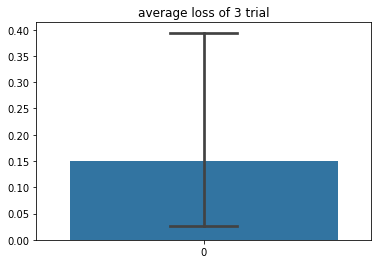

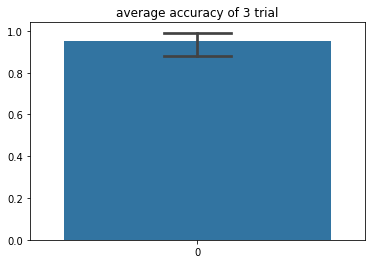

In [69]:
n = min(len(run_ids), 10)
sns.barplot(data=loss[:n], estimator=np.mean, ci=95, capsize=.2)
plt.title(f"average loss of {n} trial")
plt.show()

sns.barplot(data=accuracy[:10], estimator=np.mean, ci=95, capsize=.2)
plt.title(f"average accuracy of {n} trial")
plt.show()

## 4. *GPU*
It might be that you have access to a GPU machine that is capable of running PyTorch or TensorFlow in parallel to speed up the training. Install the GPU version and check that it recognizes the GPU and is indeed using it.

In [12]:
# check enable GPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9560117324454948780
 xla_global_id: -1]

In [ ]:
!python3 train.py -b 128 -e 15 -opt adam -lr 0.001

In [ ]:
# need if executing in colab
get_ipython().system_raw("mlflow ui --port 5000 &")
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

## 5. *Parallelism*
It might be that you have access to a multicore CPU machine. When you are running multiple runs in order to improve confiedence, then an easy way to speed up your experiment is to spawn multiple jobs at the shell, assigning the output to different log files, and write a script to combine results and draw graphs. Write the scripts necessary to achieve this, test them, and do a large-confidence experiment.

In [ ]:
info = client.get_experiment_by_name(name="appendixB-5")
if info is not None:
    client.delete_experiment(info.experiment_id)
    shutil.rmtree(path="mlruns/.trash")
    os.mkdir("mlruns/.trash")

experiment_id = client.create_experiment(name="appendixB-5")

In [75]:
subprocess.call("python3 train.py -b 128 -e 15 -opt adam -lr 0.001  &", shell=True)
subprocess.call("python3 train.py -b 128 -e 15 -opt adam -lr 0.001  &", shell=True)

0

2022-04-23 19:22:58.277006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-23 19:22:58.277549: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-23 19:22:58.354450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-23 19:22:58.354501: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600) 

/opt/conda/lib/python3.9/site-packages/mlflow/utils/autologging_utils/__init__.py:416: FutureWarning: Autologging support for keras >= 2.6.0 has been deprecated and will be removed in a future MLflow release. Use `mlflow.tensorflow.autolog()` instead.
  return _autolog(*args, **kwargs)
2022-04-23 19:23:06.265796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-23 19:23:06.266810: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-23 19:23:06.267567: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5c4c50fd13e8): /proc/driver/nvidia/version does not exist
2022-04-23 19:23:06.268634: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2022/04/23 19:23:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7934707af0a5485ab0e08dc57d5fa30c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow
2022/04/23 19:23:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '84d6264b9cd04fafa7b6b178c69b9e65', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow
2022-04-23 19:23:06.886006: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.
2022-04-23 19:23:06.905209: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/15
Epoch 1/15
253/422 [================>.............] - ETA: 1:05 - loss: 0.5614 - accuracy: 0.8221